# CAPSTONE UAS BENGKEL KODING DS-04
- Nama: Muhamad Azriel Yanuar
- Nim : A11.2022.14646
- Kelas : DS-04

### DATA INI BERISI

# EDA

| Fitur       | Deskripsi |
|-------------|-----------|
| **Gender** | Jenis kelamin |
| **Age** | Umur |
| **Height** | Tinggi badan (meter) |
| **Weight** | Berat badan (kg) |
| **family_history_with_overweight** | Riwayat keluarga obesitas |
| **FAVC** | Konsumsi makanan tinggi kalori |
| **FCVC** | Konsumsi sayuran |
| **NCP** | Frekuensi makan |
| **CAEC** | Konsumsi camilan |
| **SMOKE** | Merokok |
| **CH2O** | Konsumsi air |
| **SCC** | Kontrol kalori |
| **FAF** | Aktivitas fisik |
| **TUE** | Waktu penggunaan gadget |
| **CALC** | Konsumsi alkohol |
| **MTRANS** | Moda transportasi |
| **NObeyesdad** | Target (kategori obesitas) |

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv', sep=',', skipinitialspace=True, na_values="?")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Dimensi dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 2111
Jumlah kolom: 17


In [4]:
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [5]:
# Statistik deskriptif untuk fitur numerik
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [6]:
# Cek missing value
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [7]:
# Cek duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 18


In [8]:
# Cek jumlah nilai unik tiap kolom
df.nunique()

Age                               1393
Gender                               2
Height                            1561
Weight                            1517
CALC                                 4
FAVC                                 2
FCVC                               807
NCP                                636
SCC                                  2
SMOKE                                2
CH2O                              1262
family_history_with_overweight       2
FAF                               1185
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [9]:
# Cek isi nilai unik (berguna untuk melihat potensi inkonsistensi data)
for col in df.columns:
    print(f"\nKolom: {col}")
    print(df[col].unique())


Kolom: Age
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

Kolom: Gender
['Female' 'Male' nan]

Kolom: Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Kolom: Weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Kolom: CALC
['no' 'Sometimes' 'Frequently' nan 'Always']

Kolom: FAVC
['no' 'yes' nan]

Kolom: FCVC
[2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.015258
 1.031149   1.592183   1.21498    1.522001   2.703436   2.362918
 2.14084    2.5596     2.336044   1.813234   2.724285   2.71897
 1.133844   1.757466   2.979383   2.

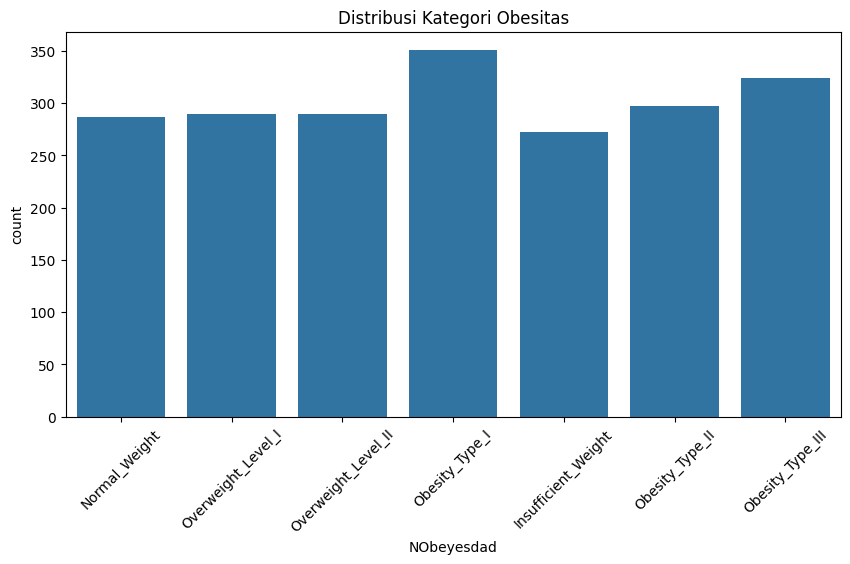

In [10]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(10,5))
sns.countplot(x='NObeyesdad', data=df)
plt.title("Distribusi Kategori Obesitas")
plt.xticks(rotation=45)
plt.show()

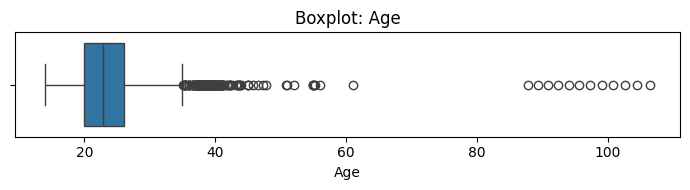

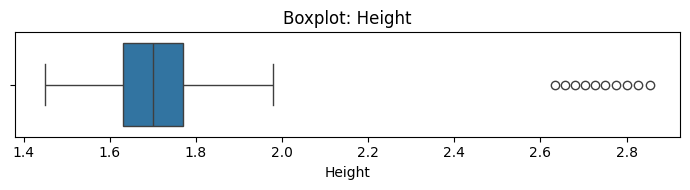

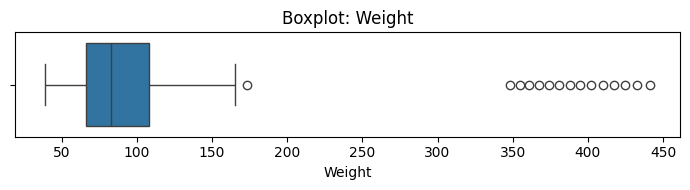

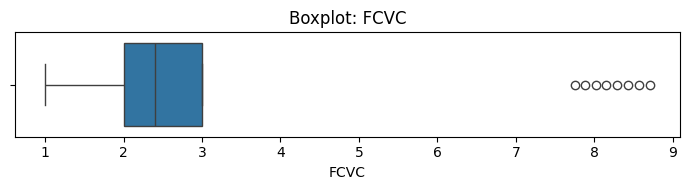

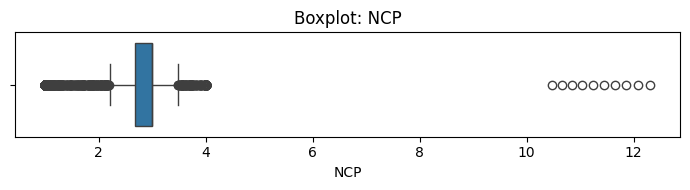

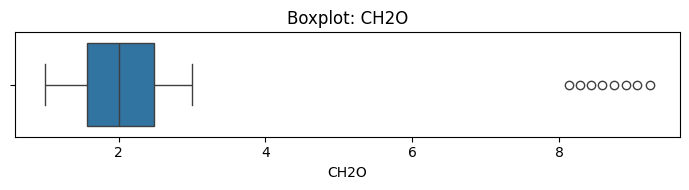

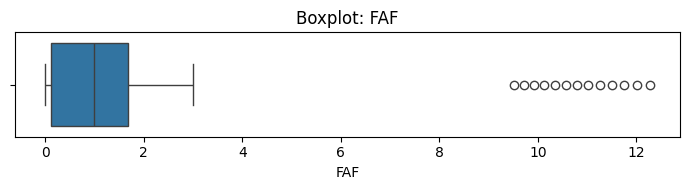

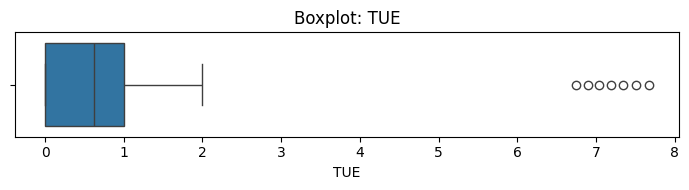

In [11]:
# Boxplot untuk mendeteksi outlier pada fitur numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numerical_cols:
    plt.figure(figsize=(7,2))
    sns.boxplot(x=pd.to_numeric(df[col], errors='coerce'))
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

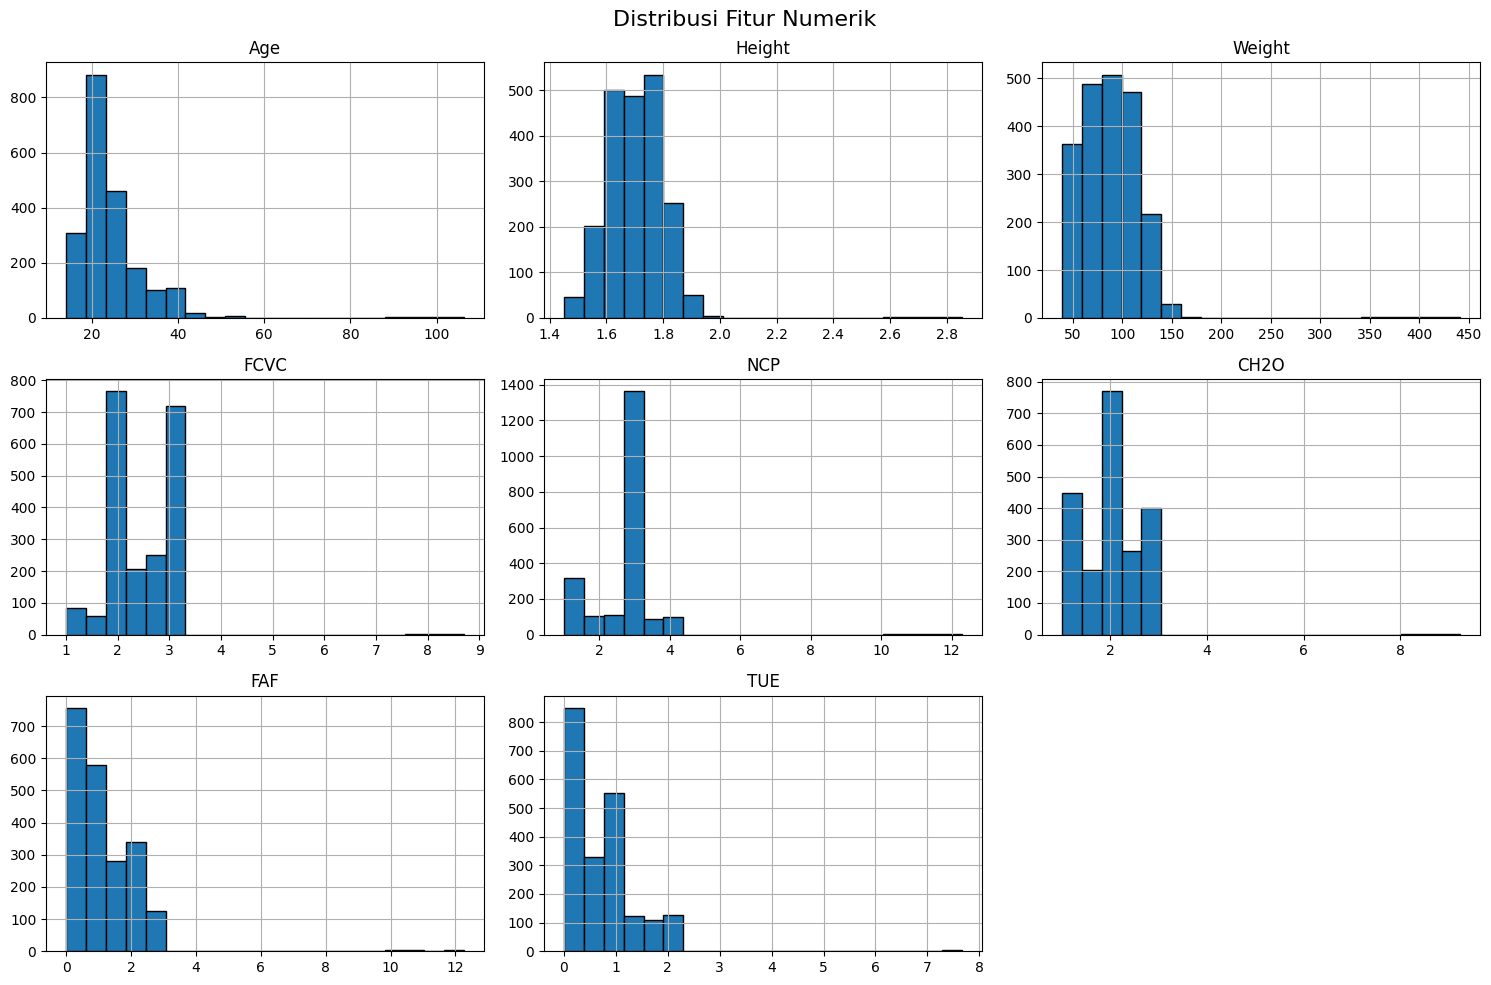

In [12]:
# Visualisasi histogram semua fitur numerik
numeric_features = df.select_dtypes(include=[np.number]).columns

df[numeric_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

# PROSESING DATA

In [13]:
# Menghapus data duplikat
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df.shape[0])

Jumlah data setelah menghapus duplikat: 2093


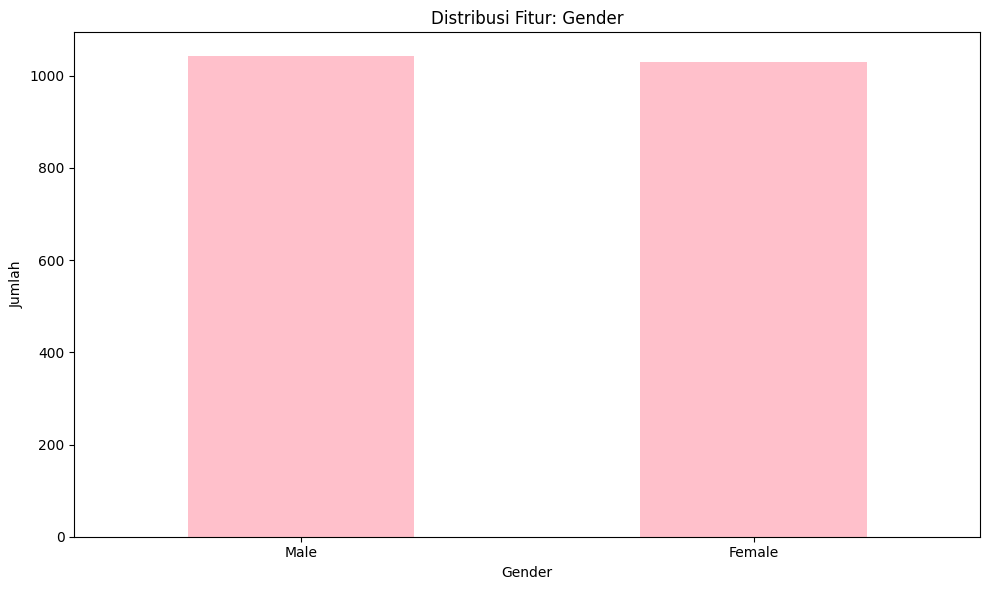

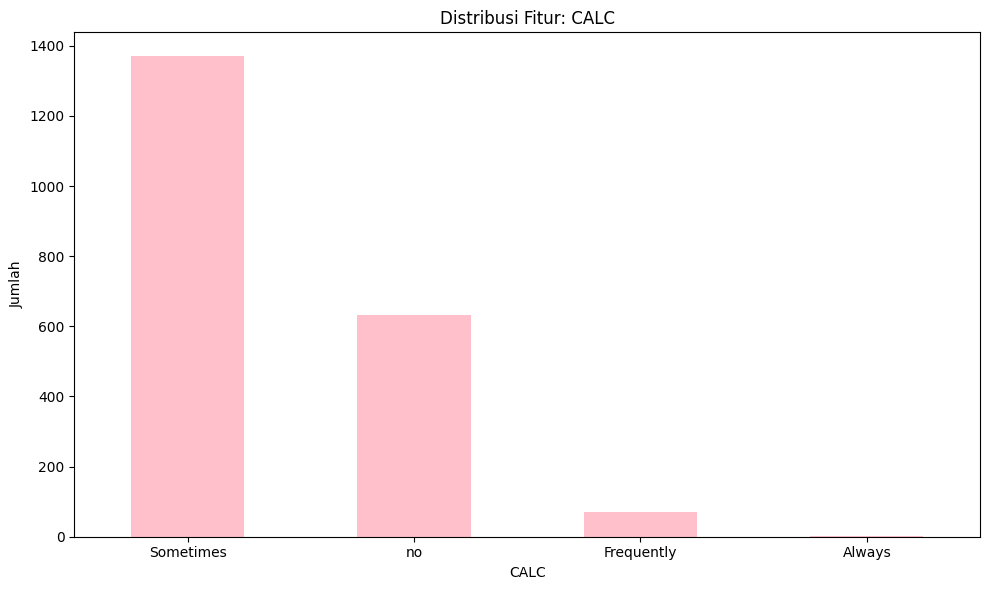

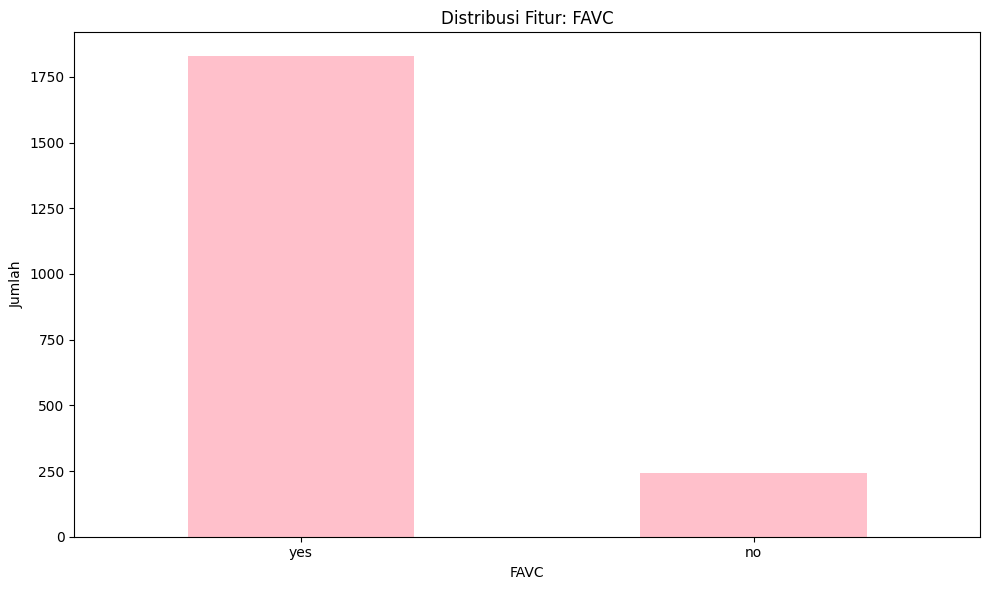

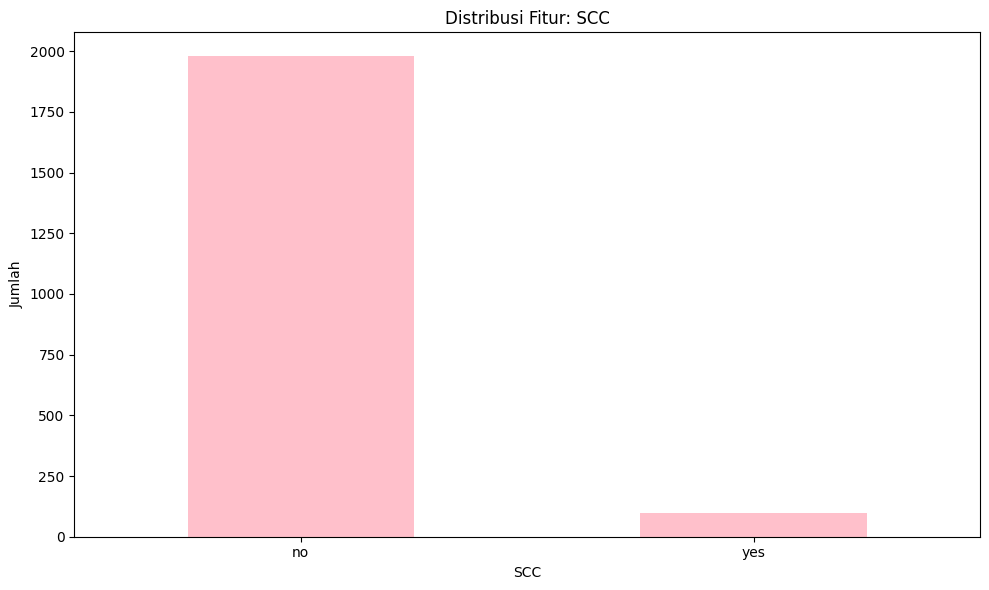

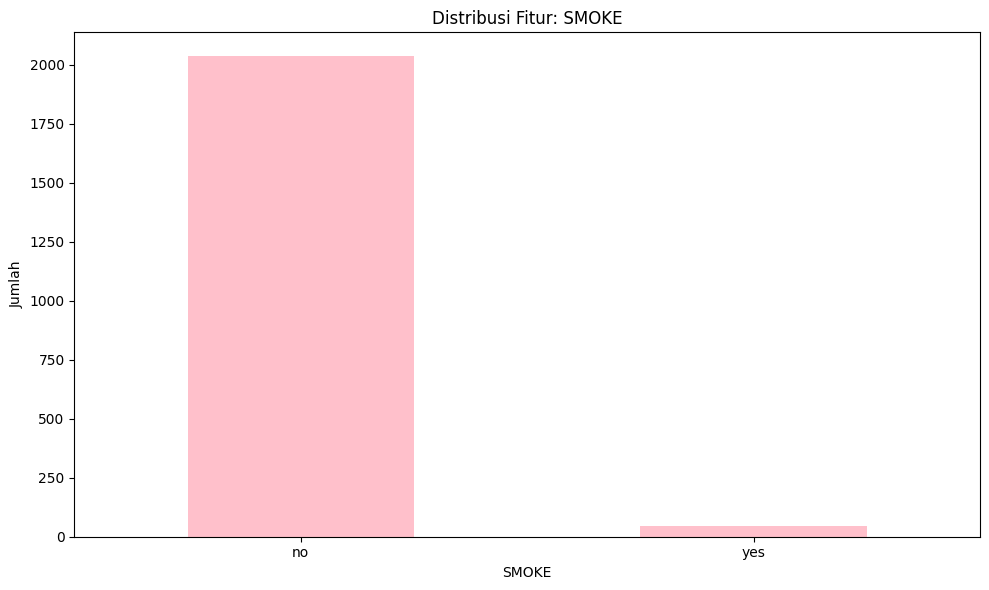

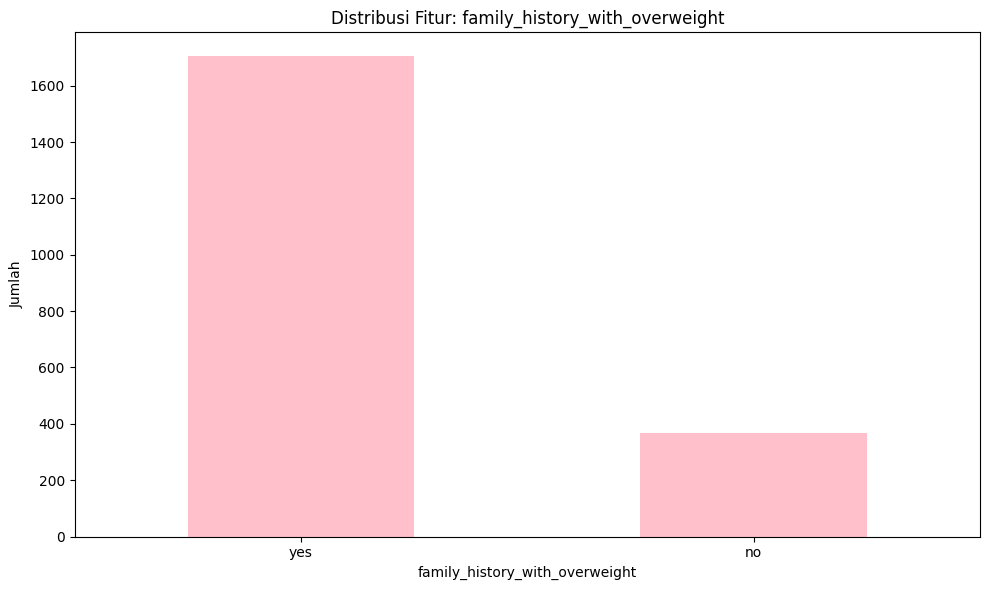

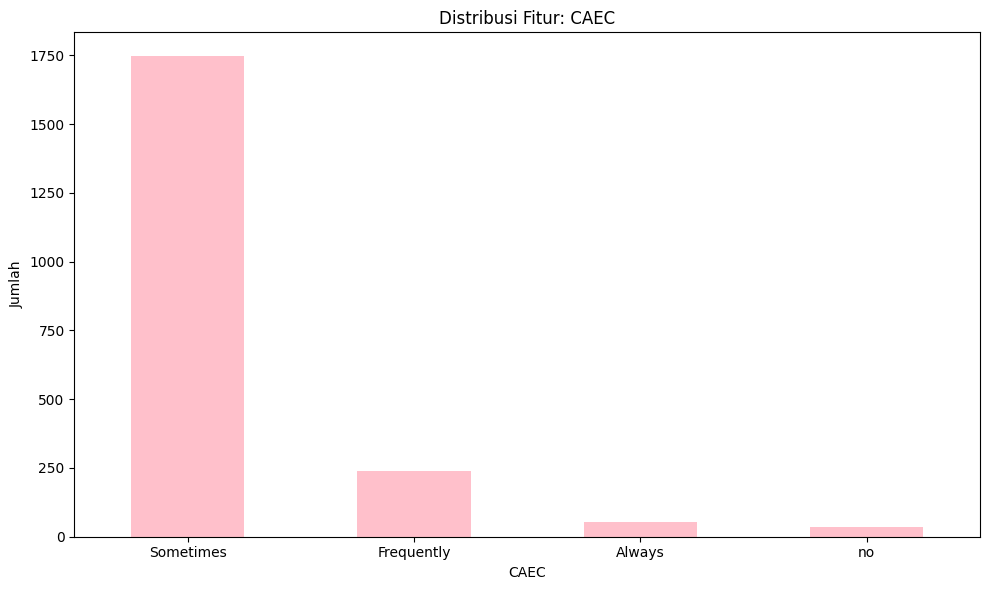

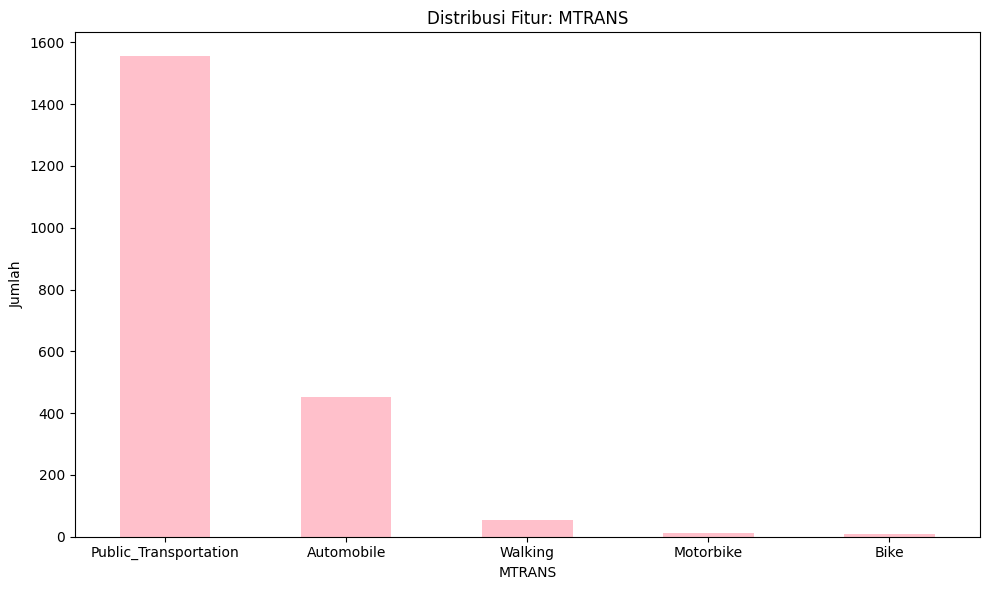

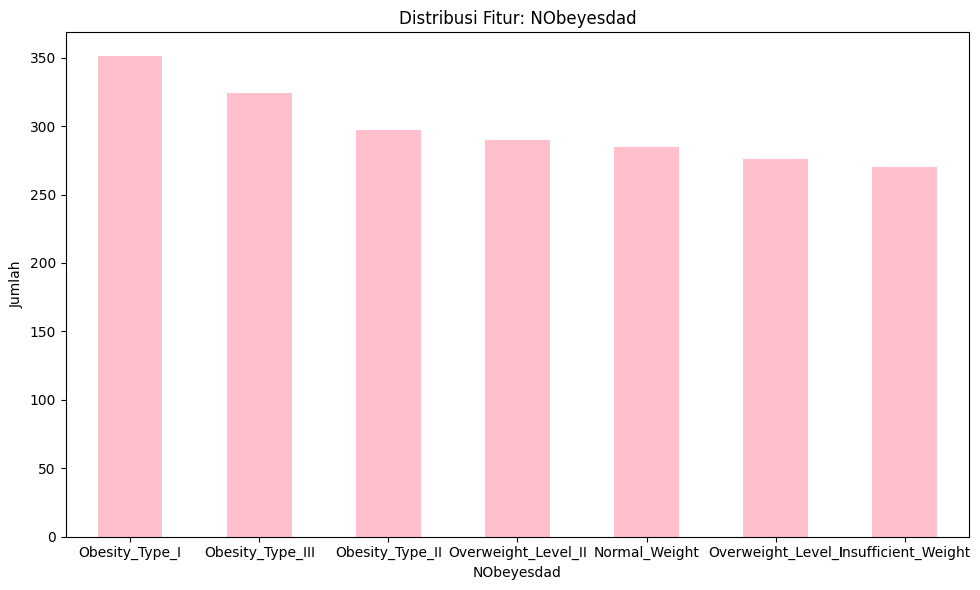

In [14]:
# Visualisasi fitur kategorikal sebelum encoding
categorical_features = df.select_dtypes(include='object').columns

for col in categorical_features:
    df[col].value_counts().plot(kind='bar', figsize=(10, 6), color='pink')
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [15]:
# Tangani missing value dengan imputasi sederhana
# Numerik: isi dengan median, Kategorikal: isi dengan modus

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [16]:
# Cek ulang missing values
print("Missing values setelah imputasi:")
print(df.isnull().sum().sum())

Missing values setelah imputasi:
0


In [17]:
# Hapus duplikat
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df.shape[0])

Jumlah data setelah menghapus duplikat: 2091


In [18]:
# Label Encoding untuk kolom target
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# One-hot encoding untuk fitur kategorikal lainnya
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols)

print("Bentuk dataset setelah encoding:", df.shape)

Bentuk dataset setelah encoding: (2091, 32)


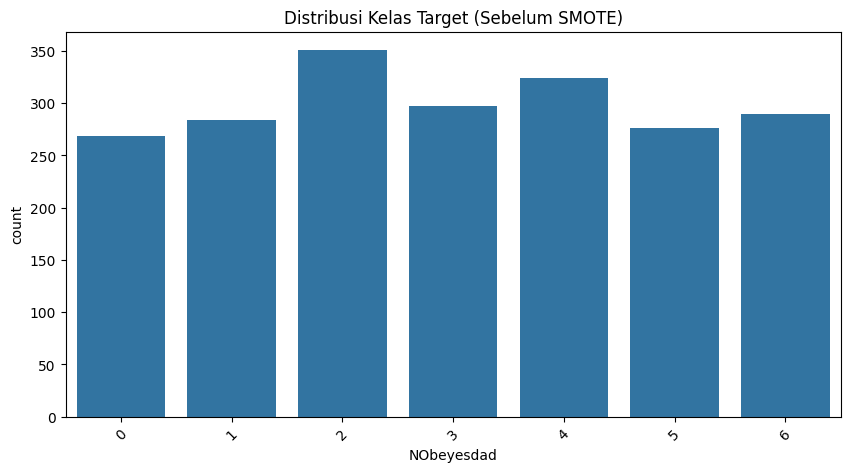

In [19]:
# Visualisasi distribusi target setelah encoding dan sebelum SMOTE
plt.figure(figsize=(10,5))
sns.countplot(x='NObeyesdad', data=df)
plt.title("Distribusi Kelas Target (Sebelum SMOTE)")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Kolom numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [21]:
# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [22]:
# Tampilkan bentuk data setelah preprocessing
print("Bentuk akhir dataset:", df.shape)
df.head()

Bentuk akhir dataset: (2091, 32)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.446341,-0.745284,-0.687004,-0.695585,0.262423,-0.035937,-0.936413,0.441696,1,True,...,True,False,False,True,False,False,False,False,True,False
1,-0.446341,-1.598267,-0.908772,0.863708,0.262423,1.328990,1.675902,-0.957748,1,True,...,True,False,False,True,False,False,False,False,True,False
2,-0.207569,0.790085,-0.326630,-0.695585,0.262423,-0.035937,0.805130,0.441696,1,False,...,True,False,False,True,False,False,False,False,True,False
3,0.269975,0.790085,-0.049419,0.863708,0.262423,-0.035937,0.805130,-0.957748,5,False,...,False,False,False,True,False,False,False,False,False,True
4,-0.326955,0.619489,0.028199,-0.695585,-1.803390,-0.035937,-0.936413,-0.957748,6,False,...,False,False,False,True,False,False,False,False,True,False


In [23]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

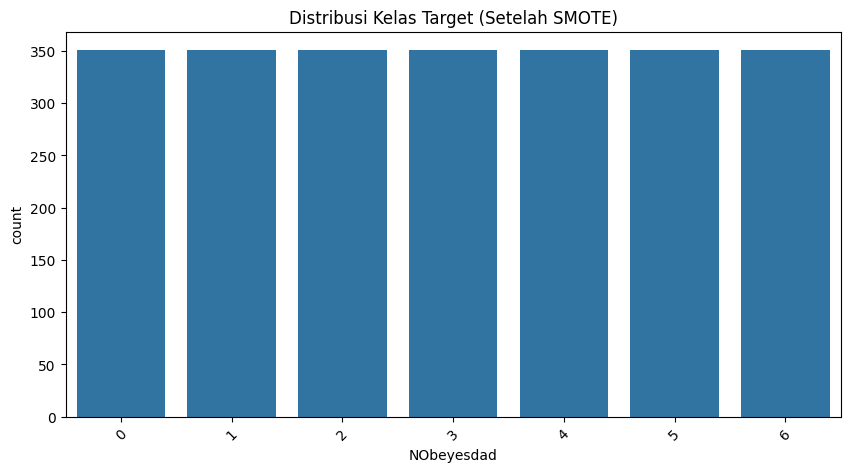

In [24]:
# Visualisasi distribusi target setelah SMOTE
plt.figure(figsize=(10,5))
sns.countplot(x=y_smote)
plt.title("Distribusi Kelas Target (Setelah SMOTE)")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Split train dan test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape)

Ukuran data latih: (1965, 31)
Ukuran data uji  : (492, 31)


# Modeling dan Evaluasi

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


🔹 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        71
           1       0.68      0.51      0.59        70
           2       0.73      0.68      0.70        68
           3       0.77      0.96      0.85        69
           4       0.92      0.96      0.94        72
           5       0.65      0.65      0.65        65
           6       0.67      0.56      0.61        77

    accuracy                           0.75       492
   macro avg       0.75      0.75      0.74       492
weighted avg       0.75      0.75      0.74       492



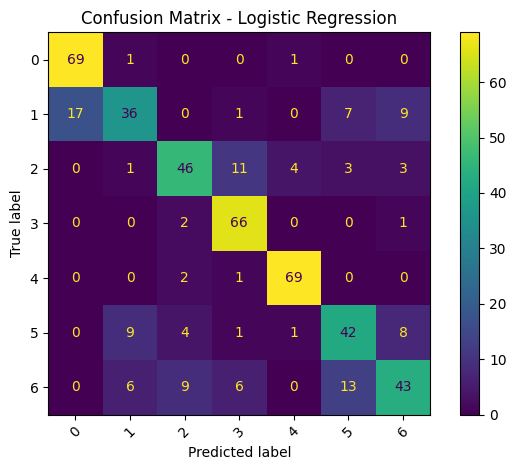

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

🔹 KNN Report
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        71
           1       0.81      0.49      0.61        70
           2       0.76      0.87      0.81        68
           3       0.85      0.99      0.91        69
           4       0.97      0.93      0.95        72
           5       0.75      0.77      0.76        65
           6       0.83      0.71      0.77        77

    accuracy                           0.81       492
   macro avg       0.81      0.81      0.80       492
weighted avg       0.81      0.81      0.80       492



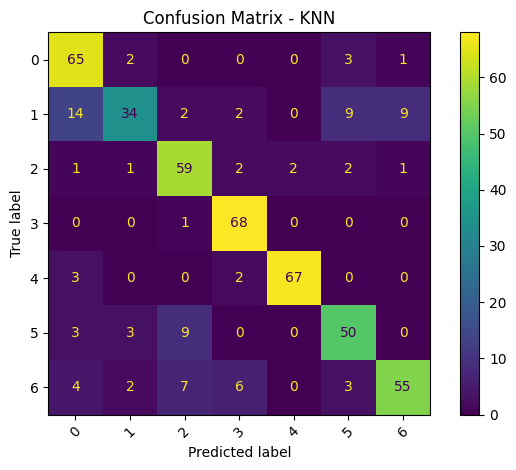

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔹 KNN Report")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot(xticks_rotation=45)
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

🔹 Random Forest Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.81      0.91      0.86        70
           2       0.96      0.97      0.96        68
           3       0.97      0.97      0.97        69
           4       0.97      1.00      0.99        72
           5       0.93      0.85      0.89        65
           6       0.93      0.88      0.91        77

    accuracy                           0.93       492
   macro avg       0.94      0.93      0.94       492
weighted avg       0.94      0.93      0.94       492



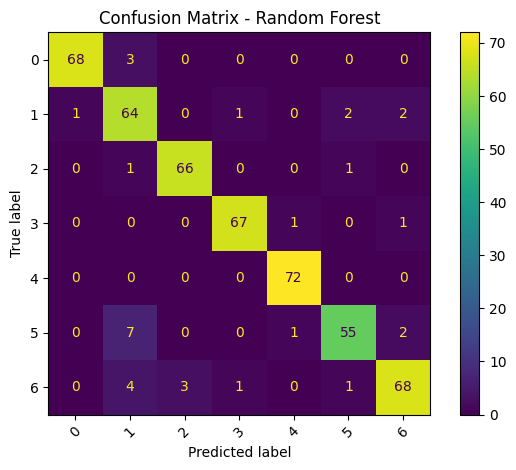

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Report")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
# Simpan akurasi tiap model
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_rf)
]

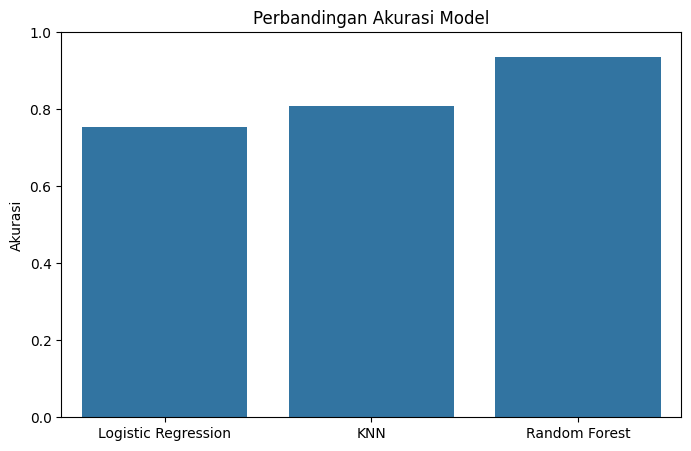

In [32]:
# Visualisasi akurasi
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best Parameters - Logistic Regression:", grid_lr.best_params_)


Best Parameters - Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


In [35]:
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters - KNN:", grid_knn.best_params_)

Best Parameters - KNN: {'n_neighbors': 3, 'weights': 'distance'}


In [36]:
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters - Random Forest:", grid_rf.best_params_)

Best Parameters - Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
# Model ulang dengan best params
lr_best = grid_lr.best_estimator_
knn_best = grid_knn.best_estimator_
rf_best = grid_rf.best_estimator_

In [38]:
# Prediksi ulang
y_pred_lr_best = lr_best.predict(X_test)
y_pred_knn_best = knn_best.predict(X_test)
y_pred_rf_best = rf_best.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# Akurasi awal
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [41]:
# Akurasi setelah tuning
acc_lr_best = accuracy_score(y_test, y_pred_lr_best)
acc_knn_best = accuracy_score(y_test, y_pred_knn_best)
acc_rf_best = accuracy_score(y_test, y_pred_rf_best)

In [42]:
# Plot
labels = ['LogReg', 'KNN', 'RandomForest']
before = [acc_lr, acc_knn, acc_rf]
after = [acc_lr_best, acc_knn_best, acc_rf_best]

In [43]:
x = np.arange(len(labels))
width = 0.35

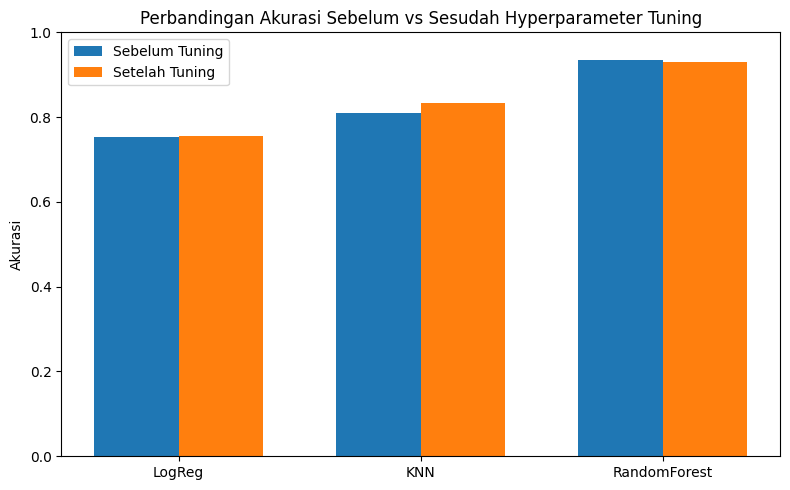

In [44]:
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, before, width, label='Sebelum Tuning')
plt.bar(x + width/2, after, width, label='Setelah Tuning')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Sebelum vs Sesudah Hyperparameter Tuning")
plt.legend()
plt.tight_layout()
plt.show()